<a href="https://colab.research.google.com/github/Rutucody/Chatbot/blob/main/Copy_of_DL_Pract_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Sentiment Analysis in a Network Graph using RNN**

Epoch 1/10
1/1 [==============================] - 4s 4s/step - loss: 0.6911 - accuracy: 0.7500 - val_loss: 0.6980 - val_accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 47ms/step - loss: 0.6861 - accuracy: 0.7500 - val_loss: 0.7029 - val_accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 67ms/step - loss: 0.6810 - accuracy: 1.0000 - val_loss: 0.7076 - val_accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 65ms/step - loss: 0.6758 - accuracy: 1.0000 - val_loss: 0.7119 - val_accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 61ms/step - loss: 0.6704 - accuracy: 1.0000 - val_loss: 0.7161 - val_accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 46ms/step - loss: 0.6647 - accuracy: 1.0000 - val_loss: 0.7202 - val_accuracy: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 0s 43ms/step - loss: 0.6585 - accuracy: 1.0000 - val_loss: 0.7244 - val_accuracy: 0.0000e+00
E

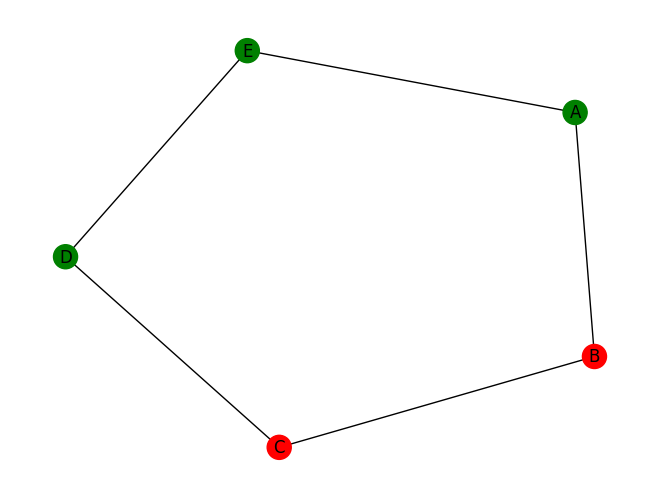

In [ ]:
import networkx as nx
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding

# Create a sample network graph
G = nx.Graph()
G.add_nodes_from(['A', 'B', 'C', 'D', 'E'])
G.add_edges_from([('A', 'B'), ('B', 'C'), ('C', 'D'), ('D', 'E'), ('A', 'E')])

# Add node features (text data) and sentiment labels
node_features = {
    'A': "This is a positive message.",
    'B': "I'm not sure about this.",
    'C': "This is a negative comment.",
    'D': "I really enjoyed this.",
    'E': "The product was disappointing."
}

node_sentiments = {
    'A': 1,
    'B': 0,
    'C': 0,
    'D': 1,
    'E': 0
}

for node in G.nodes():
    G.nodes[node]['text'] = node_features[node]
    G.nodes[node]['sentiment'] = node_sentiments[node]

# Preprocess the text data
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(list(node_features.values()))
X = tokenizer.texts_to_sequences(list(node_features.values()))
vocab_size = len(tokenizer.word_index) + 1
max_length = max([len(text.split()) for text in node_features.values()])
X = tf.keras.preprocessing.sequence.pad_sequences(X, maxlen=max_length, padding='post')

# Create the RNN model
model = Sequential()
model.add(Embedding(vocab_size, 128, input_length=max_length))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
y = np.array([node_sentiments[node] for node in G.nodes()])
model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)

# Perform sentiment analysis on the network graph
node_sentiments = model.predict(X)

# Visualize the network graph with sentiment information
pos = nx.spring_layout(G)
node_colors = ['green' if sentiment > 0.5 else 'red' for sentiment in node_sentiments]
nx.draw(G, pos, with_labels=True, node_color=node_colors)